In [1]:
import pandas as pd
df = pd.read_csv('unprocessed_feeds.csv')
df.head()

,created_at,entry_id,field1,field2,field3,field4,field5,latitude,longitude,elevation,status
0,2022-03-03T19:30:44+05:30,1,23.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-03T19:31:44+05:30,2,23.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-03-03T19:32:44+05:30,3,23.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-03-03T19:33:44+05:30,4,23.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-03T19:34:44+05:30,5,23.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38795 entries, 0 to 38794
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  38795 non-null  object 
 1   entry_id    38795 non-null  int64  
 2   field1      10585 non-null  float64
 3   field2      10585 non-null  float64
 4   field3      28208 non-null  float64
 5   field4      28208 non-null  float64
 6   field5      28208 non-null  object 
 7   latitude    0 non-null      float64
 8   longitude   0 non-null      float64
 9   elevation   0 non-null      float64
 10  status      0 non-null      float64
dtypes: float64(8), int64(1), object(2)
memory usage: 3.3+ MB


In [3]:
# Preprocessing of data 
# Join Field1 and field3 to get temp_final column
# Join Field2 and field4 to get hum_final column

In [4]:
# Forecasting
# 

In [5]:
df['temp'] = df['field1'].fillna(df['field3'])
df['hum'] = df['field2'].fillna(df['field4'])

In [6]:
df = df[['created_at','temp','hum']]

In [7]:
len(df[df['temp']==df['temp'].min()])

35

In [8]:
df['temp'] = df['temp'].replace(0,df['temp'].mean())
df['hum'] = df['hum'].replace(0,df['hum'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
x = '2022-03-03 19:30:44+05:30'
x.split('+')[0]

'2022-03-03 19:30:44'

In [10]:
df['created_at'] = df['created_at'].apply(lambda x:x.split('+')[0])

In [11]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [12]:
df['created_at']

0       2022-03-03 19:30:44
1       2022-03-03 19:31:44
2       2022-03-03 19:32:44
3       2022-03-03 19:33:44
4       2022-03-03 19:34:44
                ...        
38790   2022-04-11 17:55:56
38791   2022-04-11 17:56:56
38792   2022-04-11 17:57:56
38793   2022-04-11 17:58:56
38794   2022-04-11 17:59:55
Name: created_at, Length: 38795, dtype: datetime64[ns]

(array([738222., 738229., 738236., 738246., 738253.]),
 <a list of 5 Text major ticklabel objects>)

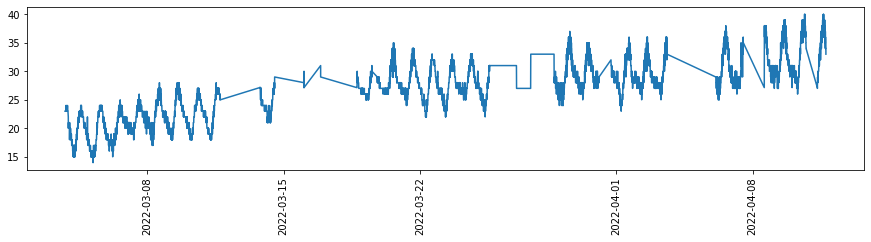

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
plt.plot(df['created_at'],df['temp'])
plt.xticks(rotation=90)

In [14]:
df_temp = df[['created_at','temp']]
df_hum = df[['created_at','hum']]

In [15]:
df_temp = df_temp.rename(columns={'created_at':'ds','temp':'y'})
df_hum = df_hum.rename(columns={'created_at':'ds','hum':'y'})

In [16]:
df_temp.head(1)

,ds,y
0,2022-03-03 19:30:44,23.0


In [17]:
df_temp.tail(1)

,ds,y
38794,2022-04-11 17:59:55,33.0


In [18]:
24*60*2

2880

In [19]:
!pip install prophet --quiet

     |████████████████████████████████| 65 kB 2.9 MB/s 
     |████████████████████████████████| 49 kB 4.2 MB/s 
     |████████████████████████████████| 45 kB 2.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


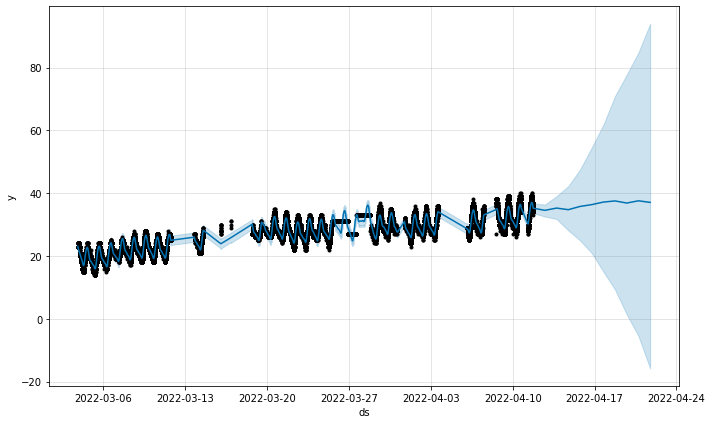

In [20]:

from prophet import Prophet
m = Prophet()
m.fit(df_temp)
future = m.make_future_dataframe(periods=10)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)

In [22]:
m.make_future_dataframe?